In [0]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import timeit
import time

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 4s 130us/step - loss: 0.1668 - acc: 0.9471 - val_loss: 0.0304 - val_acc: 0.9909
Epoch 2/5
30596/30596 [==============================] - 3s 110us/step - loss: 0.0466 - acc: 0.9863 - val_loss: 0.0261 - val_acc: 0.9926
Epoch 3/5
30596/30596 [==============================] - 3s 109us/step - loss: 0.0335 - acc: 0.9904 - val_loss: 0.0124 - val_acc: 0.9957
Epoch 4/5
30596/30596 [==============================] - 3s 109us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0082 - val_acc: 0.9971
Epoch 5/5
30596/30596 [==============================] - 3s 108us/step - loss: 0.0214 - acc: 0.9936 - val_loss: 0.0063 - val_acc: 0.9975
Training time: 0:00:17.873610
Test score: 0.0062663363600094025
Test accuracy: 0.9974703249659467
x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Train on 29404 samples, 

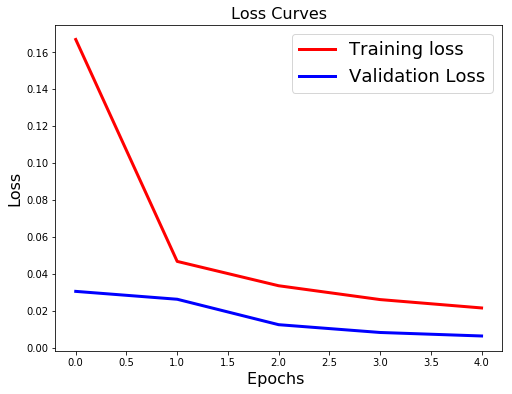

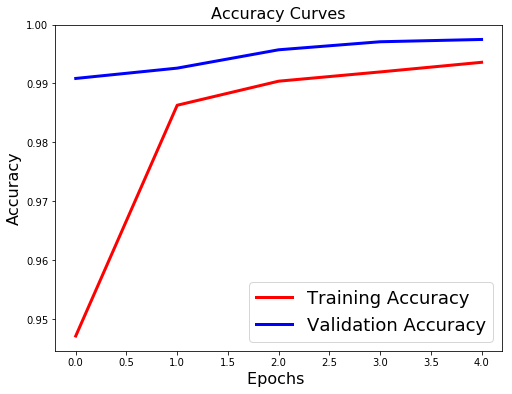

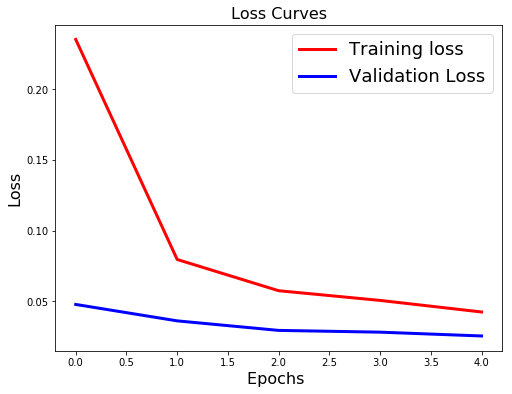

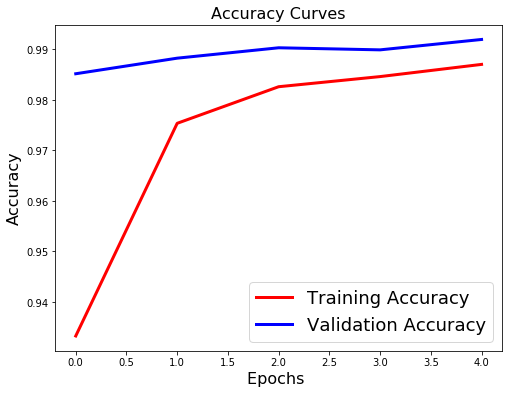

In [12]:

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

now = datetime.datetime.now

batch_size = 128
num_classes = 5
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)


def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
      # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# create two datasets one with digits below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

In [0]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 

 
# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, lrate):
	# define model
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))


  
  # compile model
  opt = SGD(lr=lrate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('lrate='+str(lrate), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
'''for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(x_train, y_train, x_test, y_test, learning_rates[i])
# show learning curves
pyplot.show() '''

'for i in range(len(learning_rates)):\n\t# determine the plot number\n\tplot_no = 420 + (i+1)\n\tpyplot.subplot(plot_no)\n\t# fit model and plot learning curves for a learning rate\n\tfit_model(x_train, y_train, x_test, y_test, learning_rates[i])\n# show learning curves\npyplot.show() '

Execution time 111.85611181599961


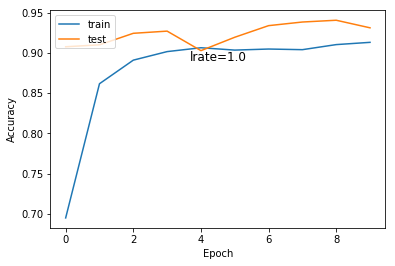

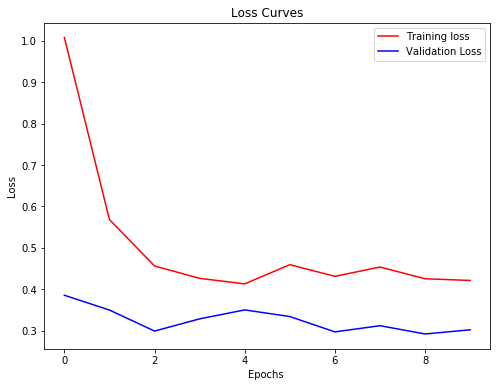

Execution time 114.1725590979986


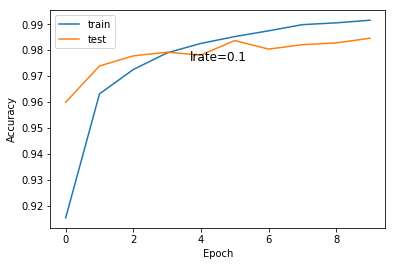

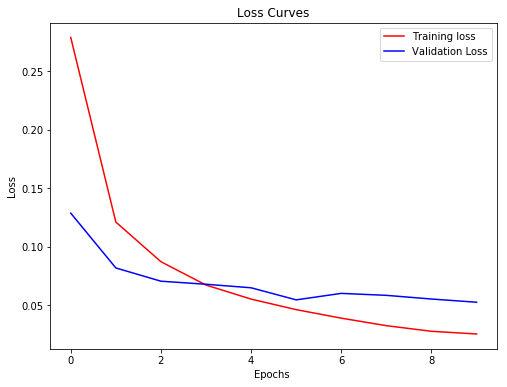

Execution time 113.79566369199893


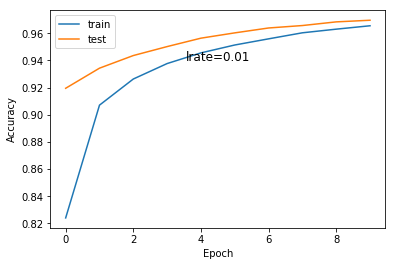

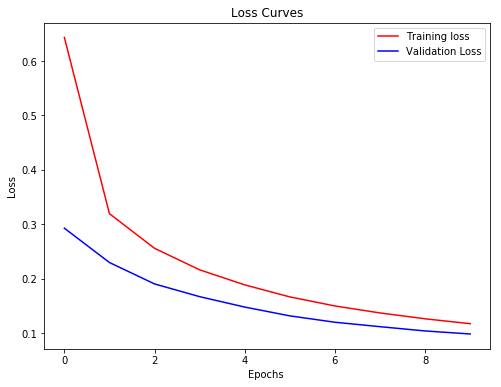

Execution time 113.64335560499967


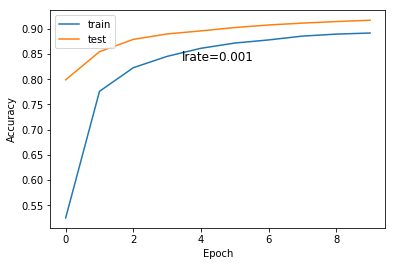

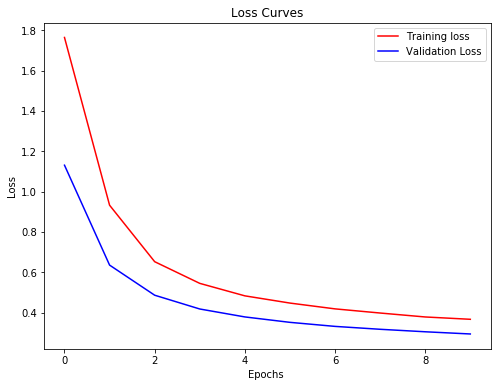

Execution time 110.71006870100246


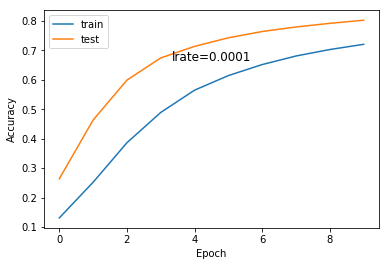

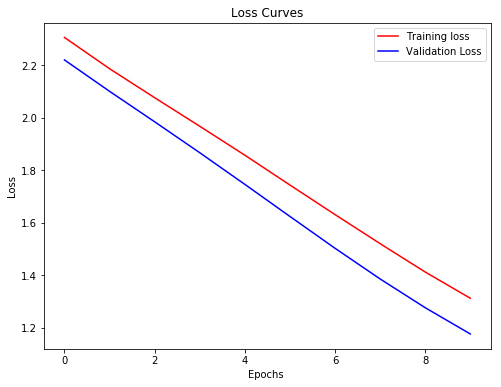

Execution time 114.17523782699936


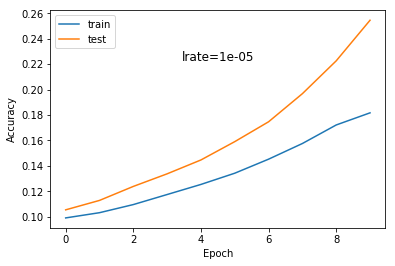

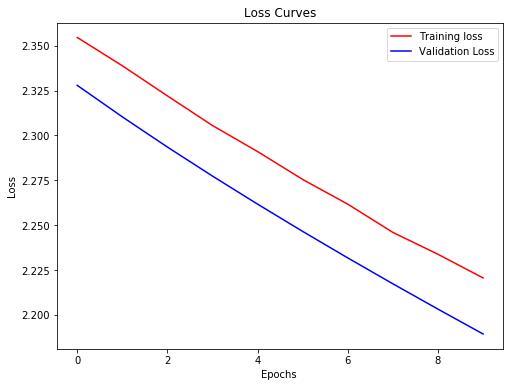

Execution time 115.3103063540002


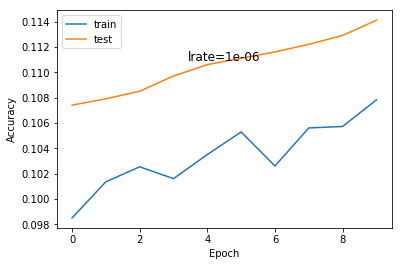

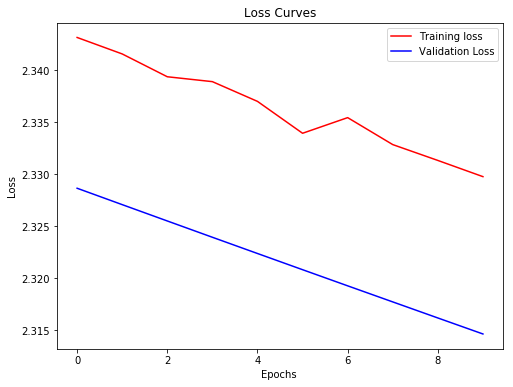

Execution time 111.85809008599972


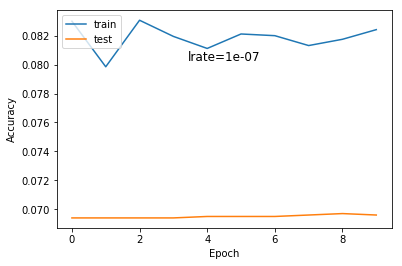

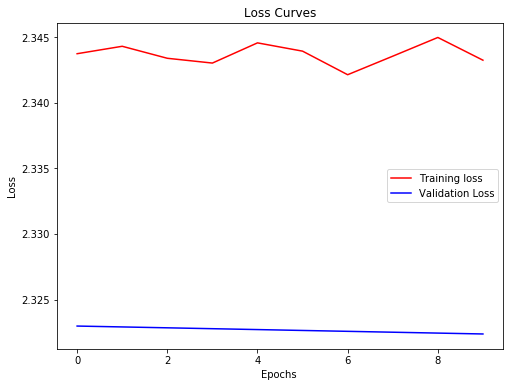

In [0]:
for i in range(len(learning_rates)):
  fit_model(x_train, y_train, x_test, y_test, learning_rates[i])


In [0]:
momentums = [0.0, 0.5, 0.9, 0.99]
def fit_model(x_train, y_train, x_test, y_test, momentum):
	# define model
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01,momentum=momentum)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('momentum='+str(momentum), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 0.09939390323236584
Test accuracy: 0.9693
Execution time 113.15846550399874


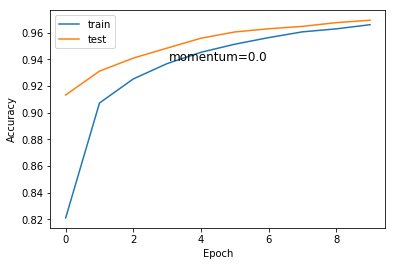

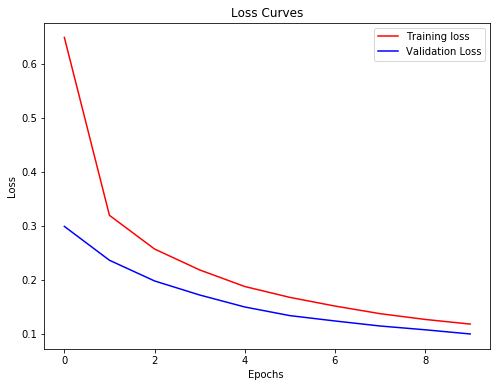

Test loss: 0.07158101026047953
Test accuracy: 0.9775
Execution time 113.56363671200234


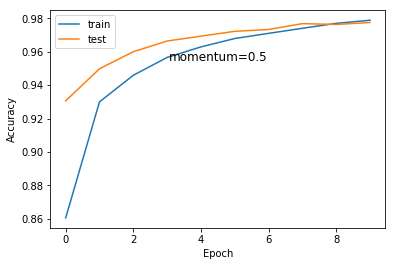

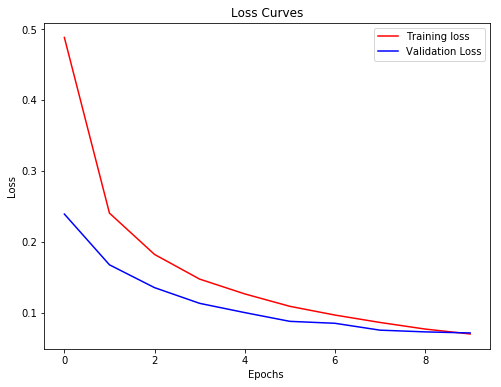

Test loss: 0.06085848073778616
Test accuracy: 0.9833
Execution time 113.22379357400132


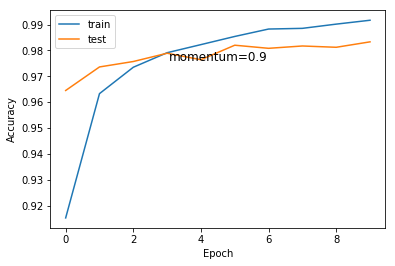

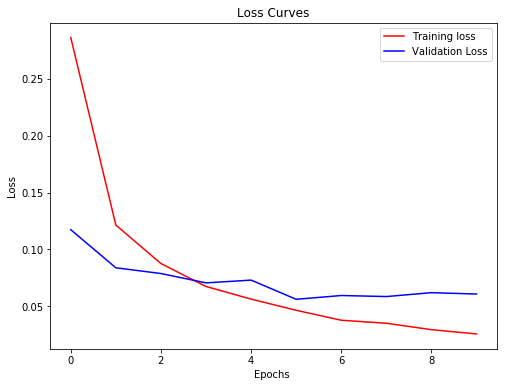

Test loss: 0.333474834240973
Test accuracy: 0.9357
Execution time 110.32168039899989


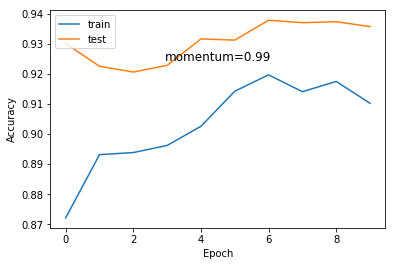

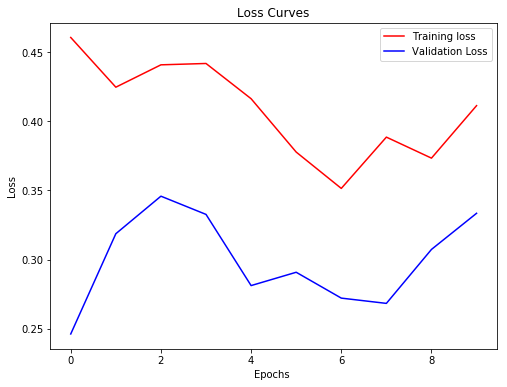

In [0]:
for i in range(len(momentums)):
  fit_model(x_train, y_train, x_test, y_test, momentums[i])


In [0]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

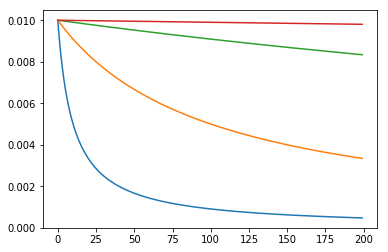

In [0]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))

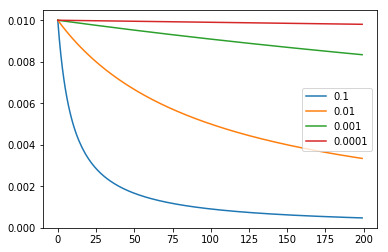

In [0]:
# demonstrate the effect of decay on the learning rate
from matplotlib import pyplot

# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))
pyplot.legend()
pyplot.show()

In [0]:
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
def fit_model(x_train, y_train, x_test, y_test, decay):
	# define model
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01,decay=decay)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('decay='+str(decay), pad=-80)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 1.7942214698791503
Test accuracy: 0.7002
Execution time 116.09730377999949


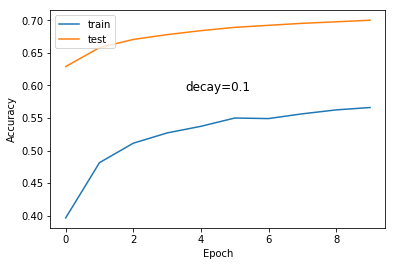

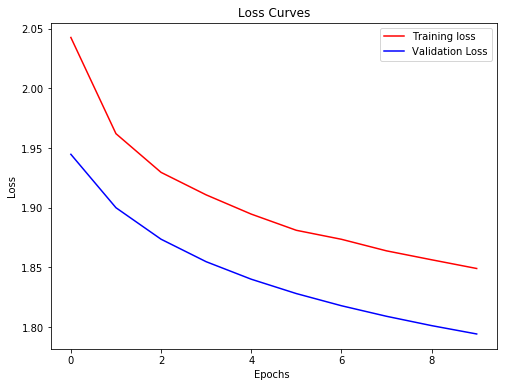

Test loss: 0.5041112363100052
Test accuracy: 0.8741
Execution time 118.75617017999684


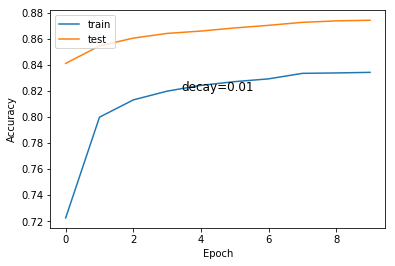

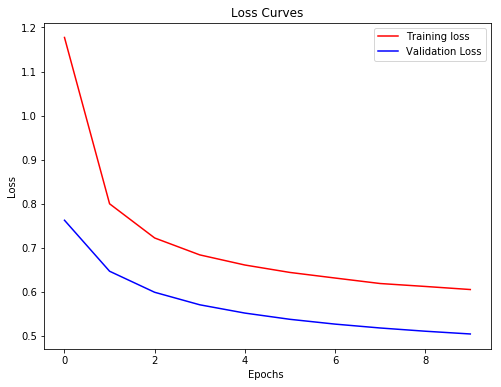

Test loss: 0.245054297927022
Test accuracy: 0.9299
Execution time 117.26706968800136


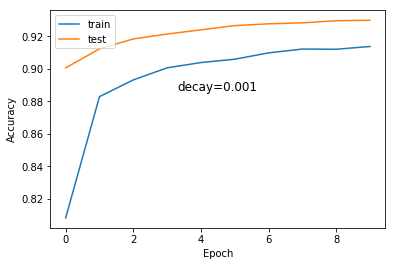

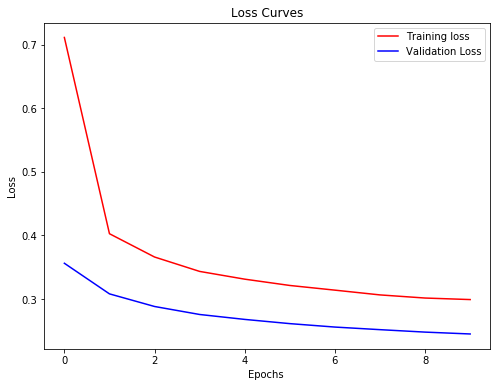

Test loss: 0.1357947429228574
Test accuracy: 0.9596
Execution time 116.56467302800229


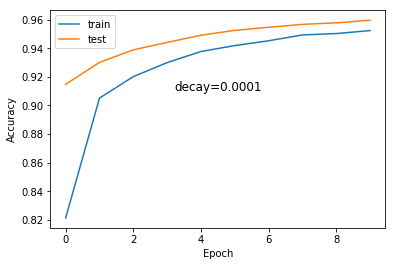

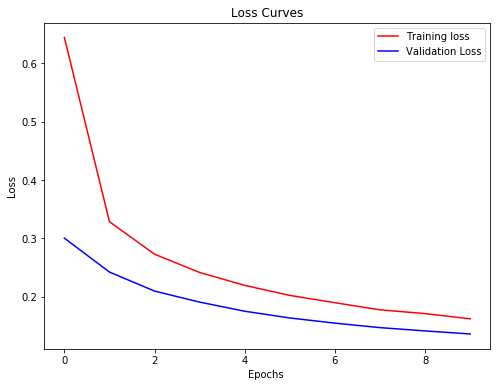

In [0]:
for i in range(len(decay_rates)):
  fit_model(x_train, y_train, x_test, y_test, decay_rates[i])


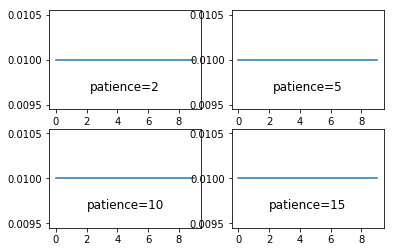

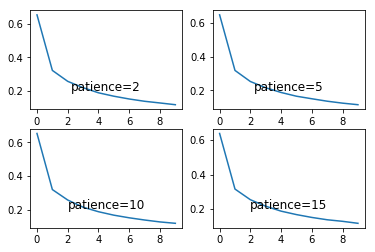

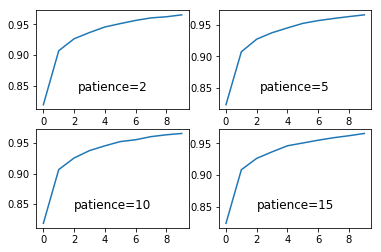

In [0]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras import backend
from matplotlib import pyplot

# monitor the learning rate
class LearningRateMonitor(Callback):
	# start of training
	def on_train_begin(self, logs={}):
		self.lrates = list()

	# end of each training epoch
	def on_epoch_end(self, epoch, logs={}):
		# get and store the learning rate
		optimizer = self.model.optimizer
		lrate = float(backend.get_value(self.model.optimizer.lr))
		self.lrates.append(lrate)


# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, patience):
	# define model
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))

	# compile model
  opt = SGD(lr=0.01)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
  lrm = LearningRateMonitor()
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, verbose=0, callbacks=[rlrp, lrm])
  return lrm.lrates, history.history['loss'], history.history['acc']

# create line plots for a series
def line_plots(patiences, series):
	for i in range(len(patiences)):
		pyplot.subplot(220 + (i+1))
		pyplot.plot(series[i])
		pyplot.title('patience='+str(patiences[i]), pad=-80)
	pyplot.show()

patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
	# fit model and plot learning curves for a patience
	lr, loss, acc = fit_model(x_train,y_train,x_test,y_test, patiences[i])
	lr_list.append(lr)
	loss_list.append(loss)
	acc_list.append(acc)
# plot learning rates
line_plots(patiences, lr_list)
# plot loss
line_plots(patiences, loss_list)
# plot accuracy
line_plots(patiences, acc_list)

In [0]:
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adam']
def fit_model(x_train, y_train, x_test, y_test, optimizer):
	# define model
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))

  # compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('optimizer='+str(optimizer), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 0.09837937477845698
Test accuracy: 0.97
Execution time 115.6153435769993


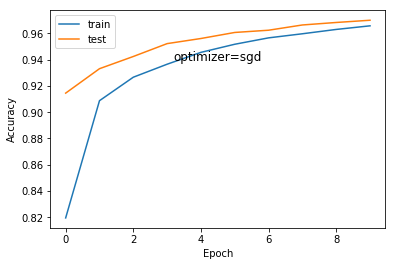

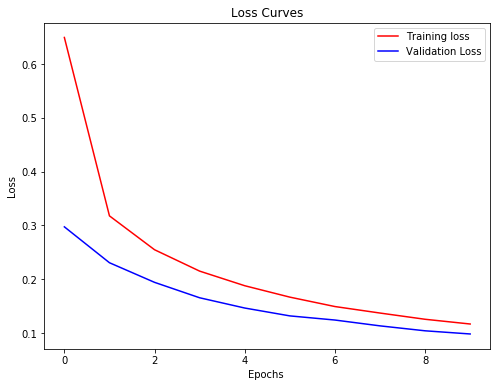

Test loss: 0.15272384976677314
Test accuracy: 0.9793
Execution time 134.04890084


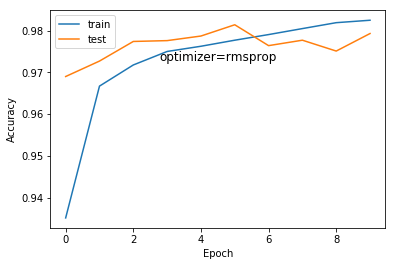

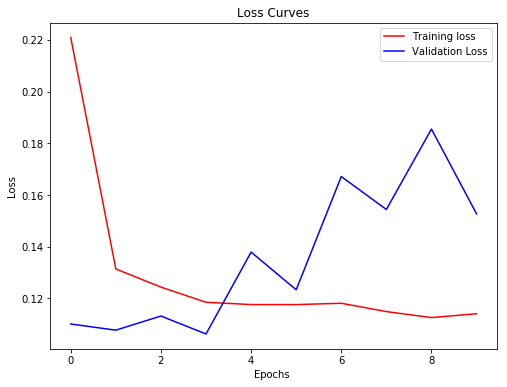

Test loss: 0.05472976504121907
Test accuracy: 0.983
Execution time 129.2784892430027


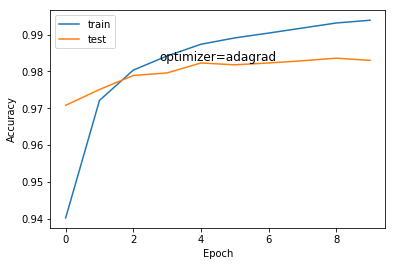

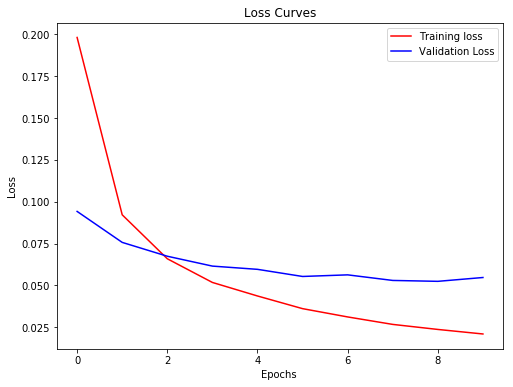

Test loss: 0.08764459901464634
Test accuracy: 0.9788
Execution time 140.37492237900005


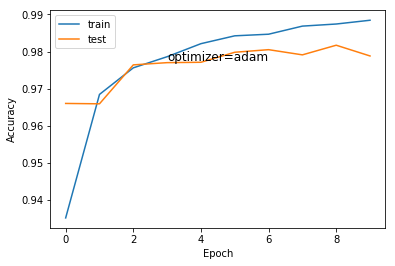

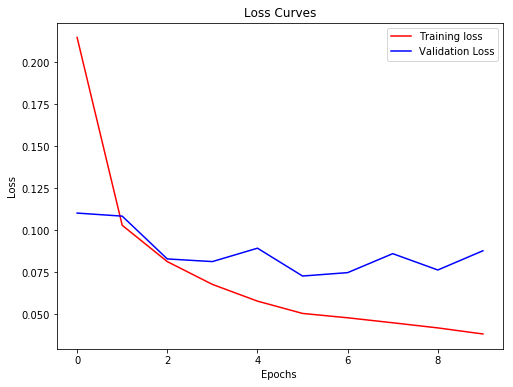

In [0]:
for i in range(len(optimizer)):
  fit_model(x_train, y_train, x_test, y_test, optimizer[i])
